___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import os
import pandas as pd
import pandas_datareader.data as wb
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
#data is taken from 2010 to 2020
start = datetime.date(2010,1,1)
end = datetime.date(2020,1,1)

In [3]:
bac = wb.DataReader('BAC','iex', start, end, api_key = 'pk_9a711aefb0984623b1504f227b36249d')
c = wb.DataReader('C','iex', start, end, api_key = 'pk_9a711aefb0984623b1504f227b36249d')
gs = wb.DataReader('GS','iex', start, end, api_key = 'pk_9a711aefb0984623b1504f227b36249d')
jpm = wb.DataReader('JPM','iex', start, end, api_key = 'pk_9a711aefb0984623b1504f227b36249d')
ms = wb.DataReader('MS','iex', start, end, api_key = 'pk_9a711aefb0984623b1504f227b36249d')
wfc = wb.DataReader('WFC','iex', start, end, api_key = 'pk_9a711aefb0984623b1504f227b36249d')

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['bac','c','gs','jpm','ms','wfc']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.concat([bac,c,gs,jpm,ms,wfc],axis = 1,keys = tickers)

** Set the column name levels (this is filled out for you):**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker    bac                                        c                    \
Stock Info    open    high    low  close       volume  open  high   low close   
date                                                                            
2010-01-04   15.24  15.750  15.12  15.69  180845102.0  33.6  34.1  33.4  34.0   
2010-01-05   15.74  16.210  15.70  16.20  209521213.0  34.2  35.5  34.1  35.3   
2010-01-06   16.21  16.540  16.03  16.39  205257888.0  35.6  36.8  35.1  36.4   
2010-01-07   16.68  17.185  16.51  16.93  320868357.0  36.9  37.0  36.1  36.5   
2010-01-08   16.98  17.100  16.63  16.78  220104605.0  36.5  36.7  35.1  35.9   

Bank Ticker              ...     ms                                      wfc  \
Stock Info       volume  ...   open    high    low  close      volume   open   
date                     ...                                                   
2010-01-04   40679346.5  ...  30.70  31.968  30.63  30.91  20373994.0  27.02   
2010-01-05   66861707.5  ...  31.01  32.130  30.93  32.04  22523317.0  27.27   
2010-01-06   67433882.7  ...  31.97  32.590  31.79  32.45  17029777.0  28.03   
2010-01-07   67245181.6  ...  32.46  33.270  32.27  32.92  18692919.0  28.12   
2010-01-08   62409768.5  ...  32.60  32.820  31.98  32.25  15994905.0  28.90   

Bank Ticker                                 
Stock Info    high    low  close    volume  
date                                        
2010-01-04   27.48  26.82  27.32  39338101  
2010-01-05   28.24  27.24  28.07  55418926  
2010-01-06   28.33  27.79  28.11  33239586  
2010-01-07   29.43  27.92  29.13  61648945  
2010-01-08   29.35  28.60  28.86  35512359  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
from pandas import IndexSlice as idx
bank_stocks.loc[:,idx['bac':'wfc',['close']]].max()

Bank Ticker  Stock Info
bac          close          35.52
c            close          80.08
gs           close         273.38
jpm          close         139.40
ms           close          58.91
wfc          close          65.93
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

In [39]:
def PC(n):
    l = []
    for v in range(len(n)-1):
        x = (n[v+1] - n[v])/n[v]
        l.append(x)
    return l
for i in tickers:
    returns[i+'_return'] = PC(bank_stocks[i]['close'].values)
ls = list(bank_stocks.index)
ls.pop(0)
returns.index = ls
returns.index = pd.to_datetime(returns.index)
returns.index.name = 'Date'

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [40]:
returns

,bac_return,c_return,gs_return,jpm_return,ms_return,wfc_return
Date,,,,,,
2010-01-05,0.032505,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.011728,0.031161,-0.010673,0.005495,0.012797,0.001425
2010-01-07,0.032947,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.008860,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269
2010-01-11,0.008939,0.011142,-0.015776,-0.003357,-0.006512,-0.002079
...,...,...,...,...,...,...
2019-12-31,0.001991,0.004779,0.000566,0.005554,0.003140,0.003731
2014-08-13,NaN,NaN,-0.250337,-0.593113,-0.373631,-0.070818
2014-08-19,NaN,NaN,0.009224,0.014810,0.015928,0.017403


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

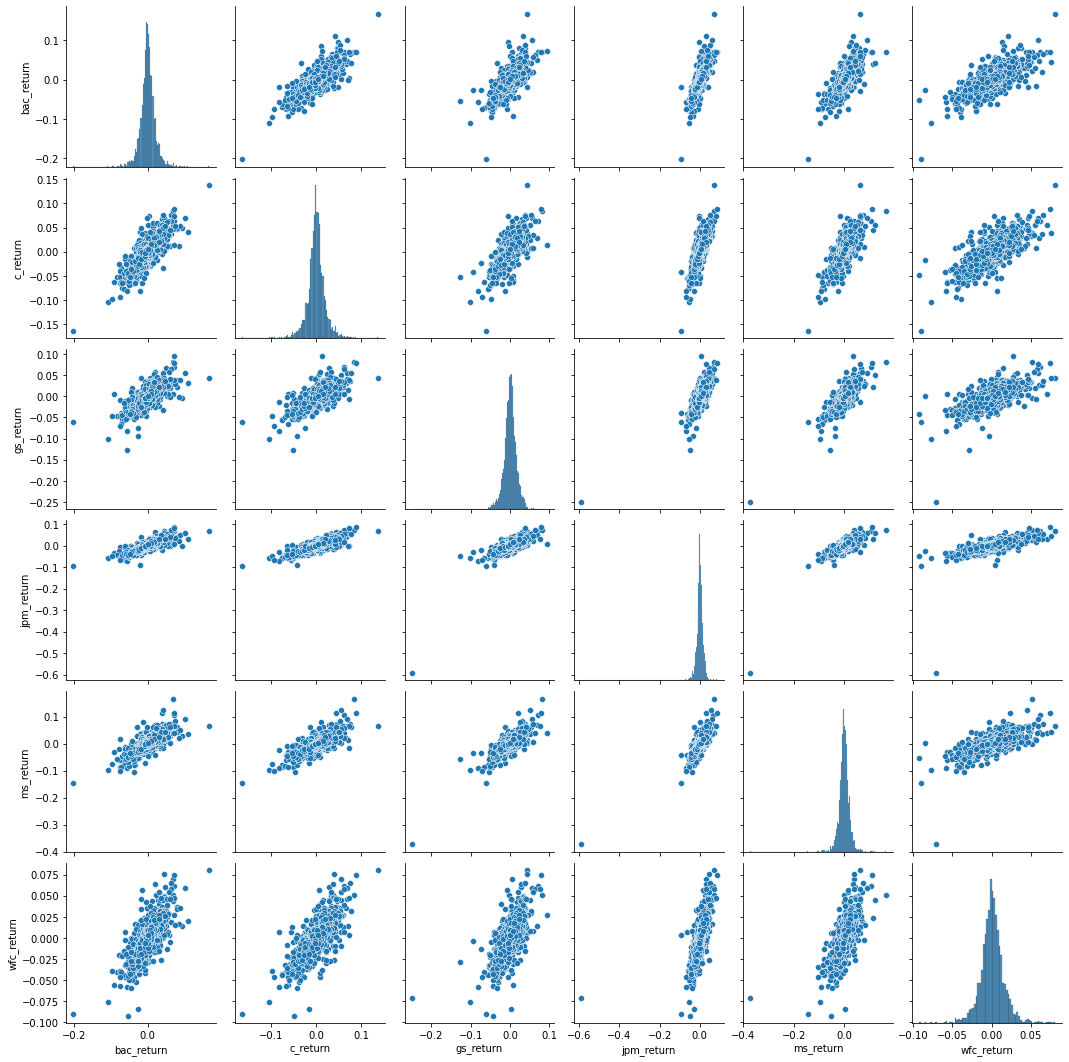

In [13]:
import seaborn as sns
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [41]:
n = []
for i in range(0,len(returns.columns)):
    a = returns[returns.iloc[:,i] == returns.iloc[:,i].min()].index[0]
    a = pd.to_datetime(a)
    n.append(a)
index = returns.columns
df1 = pd.DataFrame(n,index = index, columns = ['Date for worst drop'])
df1

,Date for worst drop
bac_return,2011-08-08
c_return,2011-08-08
gs_return,2014-08-13
jpm_return,2014-08-13
ms_return,2014-08-13
wfc_return,2018-02-05


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [42]:
n = []
for i in range(0,len(returns.columns)):
    a = returns[returns.iloc[:,i] == returns.iloc[:,i].max()].index[0]
    a = pd.to_datetime(a)
    n.append(a)
index = returns.columns
df2 = pd.DataFrame(n,index = index, columns = ['Date for best gain'])
df2

,Date for best gain
bac_return,2011-08-09
c_return,2011-08-09
gs_return,2019-01-16
jpm_return,2011-11-30
ms_return,2011-10-27
wfc_return,2011-08-09


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [43]:
returns.std()

bac_return    0.020427
c_return      0.019479
gs_return     0.017181
jpm_return    0.019690
ms_return     0.022065
wfc_return    0.015254
dtype: float64

In [44]:
returns[returns.index.year == 2015].std()

bac_return    0.016163
c_return      0.015289
gs_return     0.014046
jpm_return    0.014017
ms_return     0.016249
wfc_return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ms_return', ylabel='Density'>

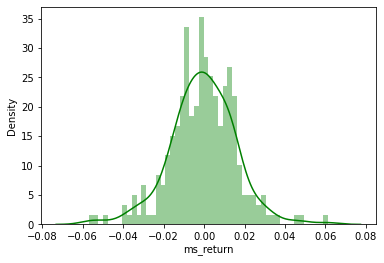

In [45]:
import seaborn as sns
r2 = returns[returns.index.year == 2015].loc[:,'ms_return']
sns.distplot(r2, color = 'green', bins = 50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='c_return', ylabel='Density'>

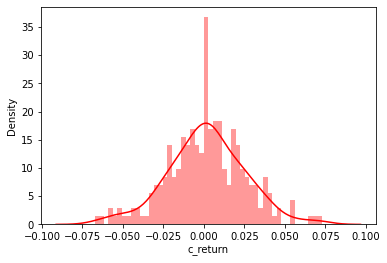

In [46]:
r3 = returns[returns.index.year == 2010].loc[:,'c_return']
sns.distplot(r3, color = 'red', bins = 50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [48]:
close_stocks = bank_stocks.loc[:,idx['bac':'wfc',['close']]]
close_stocks.index = pd.to_datetime(close_stocks.index)

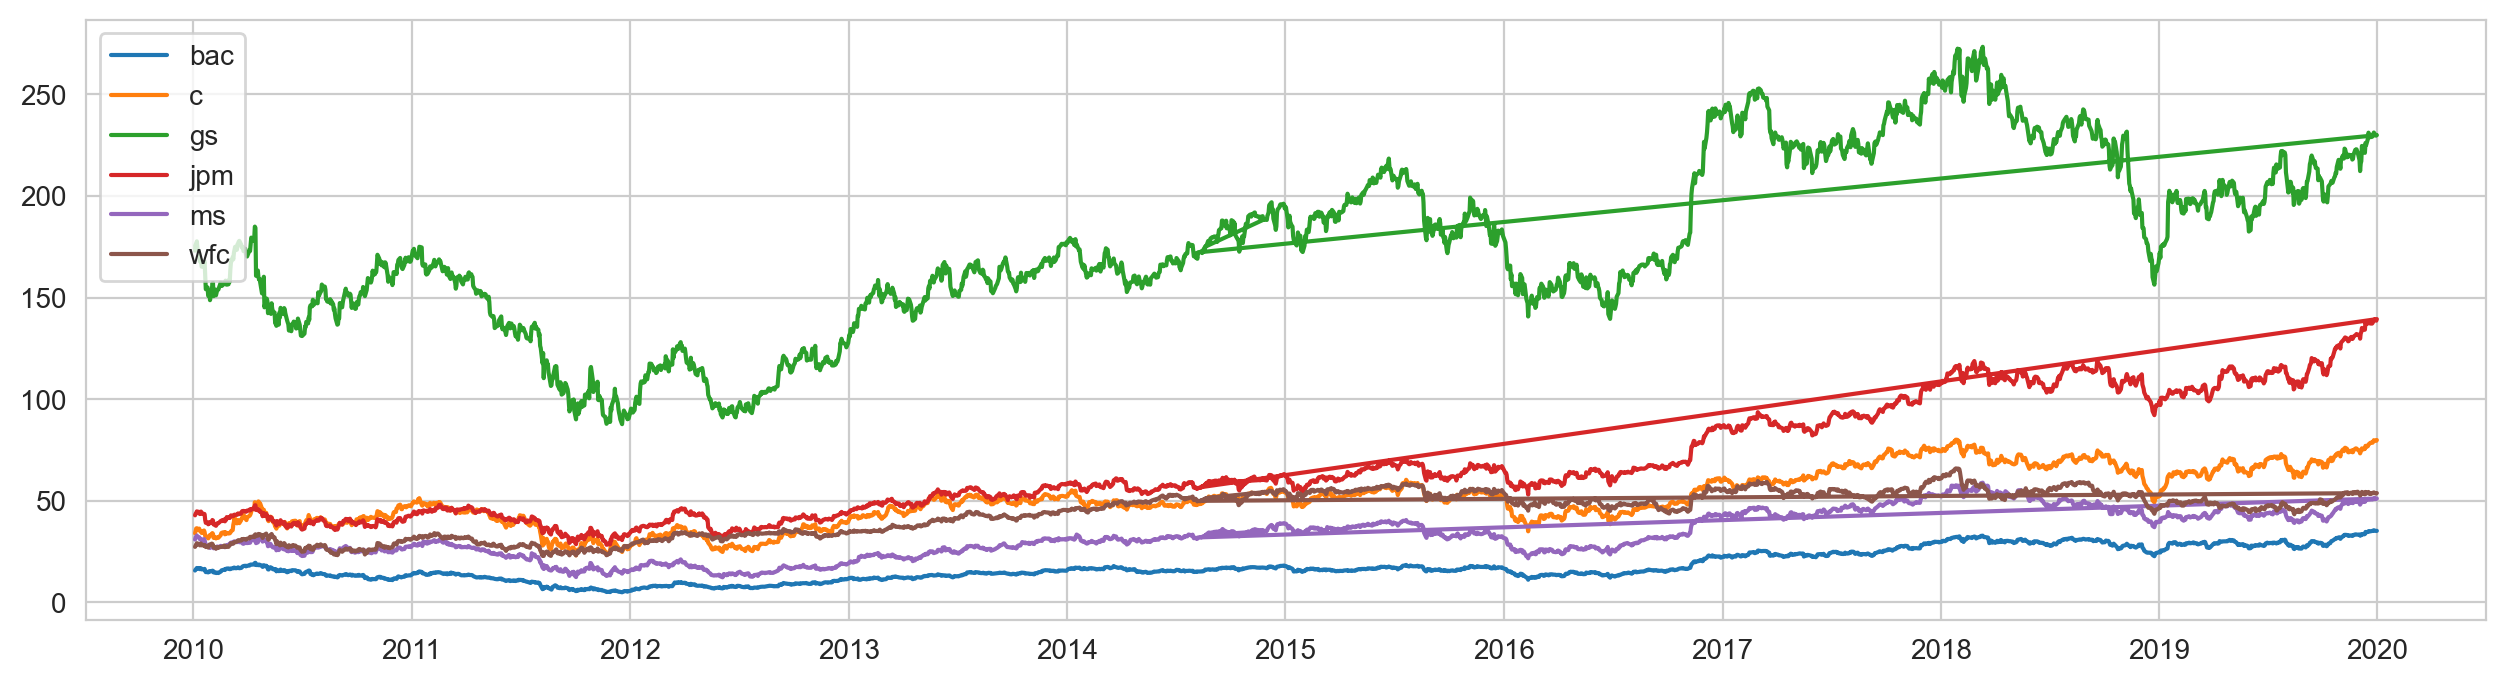

In [49]:
fig = plt.figure(figsize = (12,3), dpi = 200)
ax = fig.add_axes([0,0,1,1])
cs = []
for i in range(len(close_stocks.columns)):
    a = close_stocks.columns[i][0]
    cs.append(a)
for i in cs:
    ax.plot(close_stocks.index, close_stocks[i]['close'], label = i)
ax.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [50]:
bac_close = bank_stocks['bac']['close'].to_frame()
bac_close.index = pd.to_datetime(bac_close.index)
bac_close.dropna(inplace = True)
bac_close['SMA'] = bac_close['close'].rolling(window = 30).mean()
bac_close2011 = bac_close[bac_close.index.year == 2011]

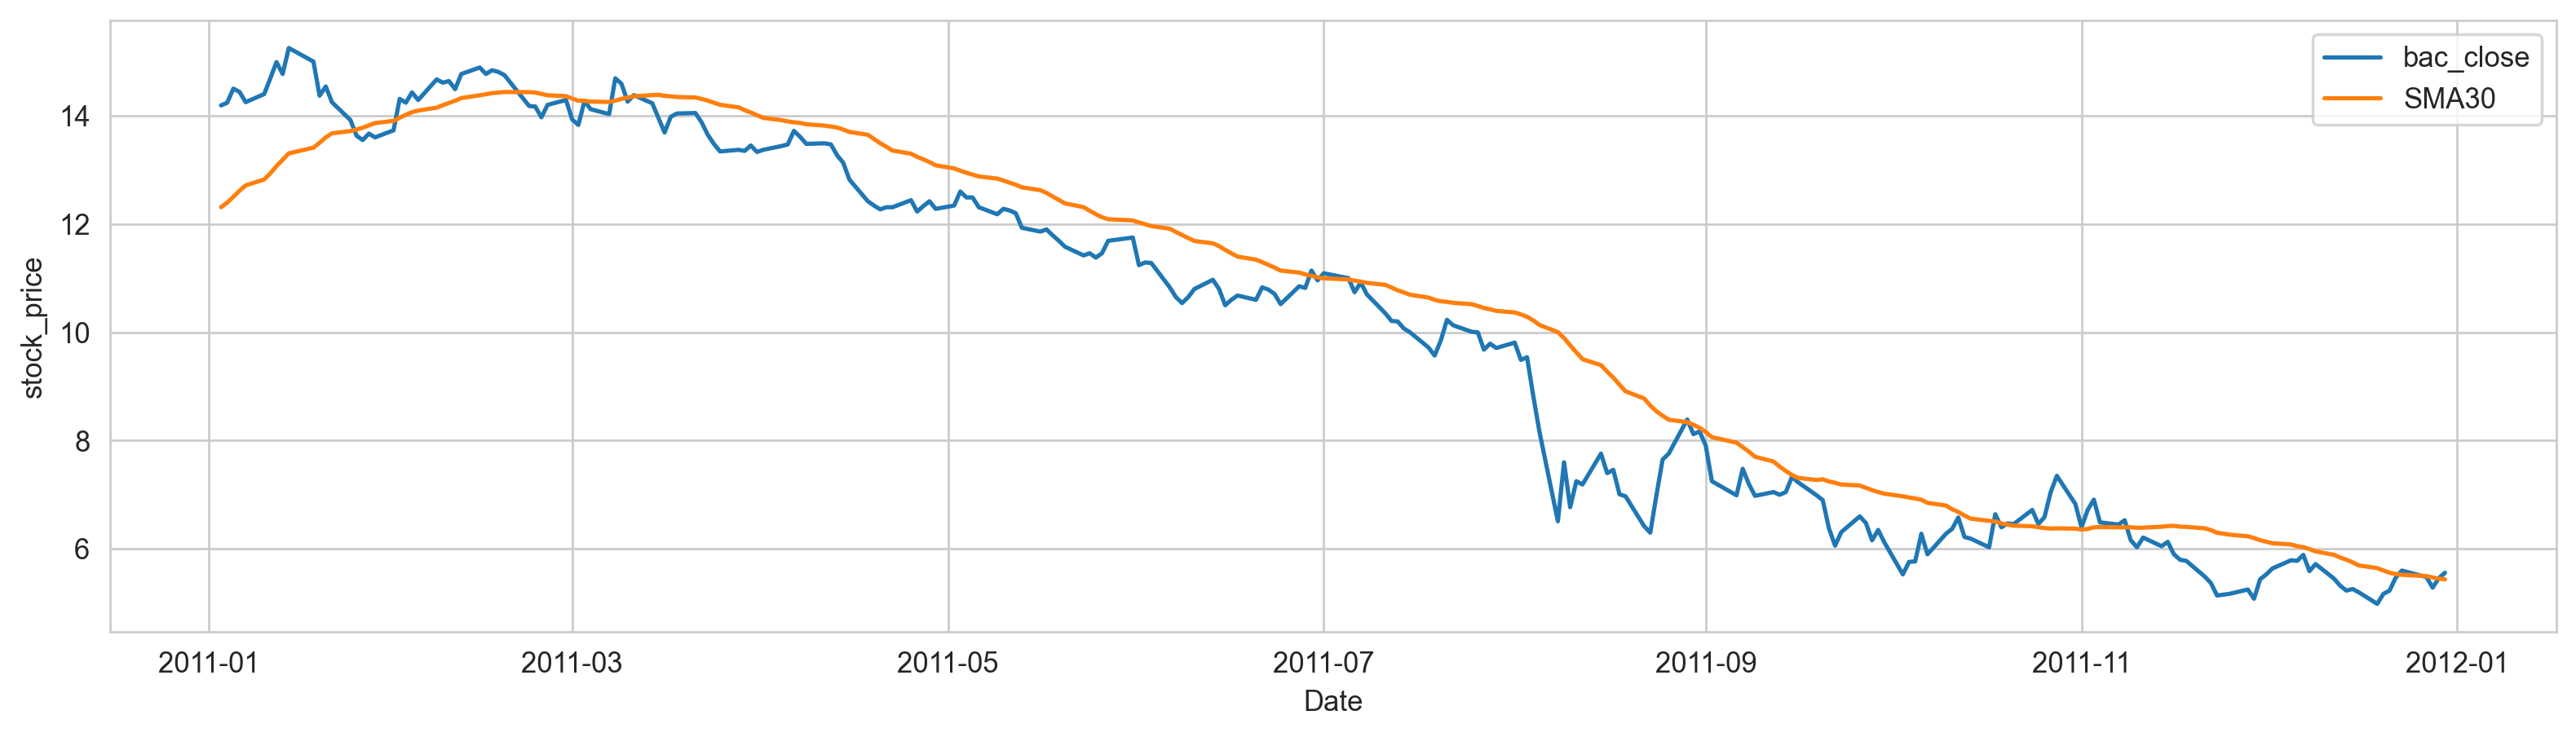

In [51]:
fig = plt.figure(figsize = (12,3), dpi = 250)
fg = fig.add_axes([0,0,1,1])
fg.plot(bac_close2011.index, bac_close2011['close'], label = 'bac_close')
fg.plot(bac_close2011.index,bac_close2011['SMA'], label = 'SMA30')
fg.set_xlabel('Date')
fg.set_ylabel('stock_price')
fg.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker-Stock Info', ylabel='Bank Ticker-Stock Info'>

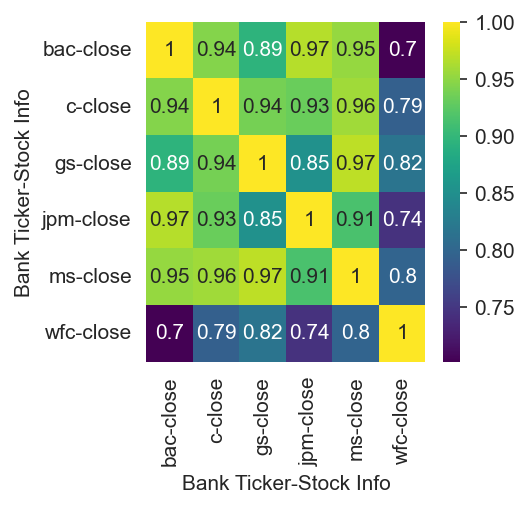

In [52]:
dfh = bank_stocks.loc[:,idx['bac':'wsf',['close']]]
plt.figure(figsize = (3,3), dpi = 150)
sns.heatmap(dfh.corr(),cmap = 'viridis',annot =True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 900x900 with 0 Axes>

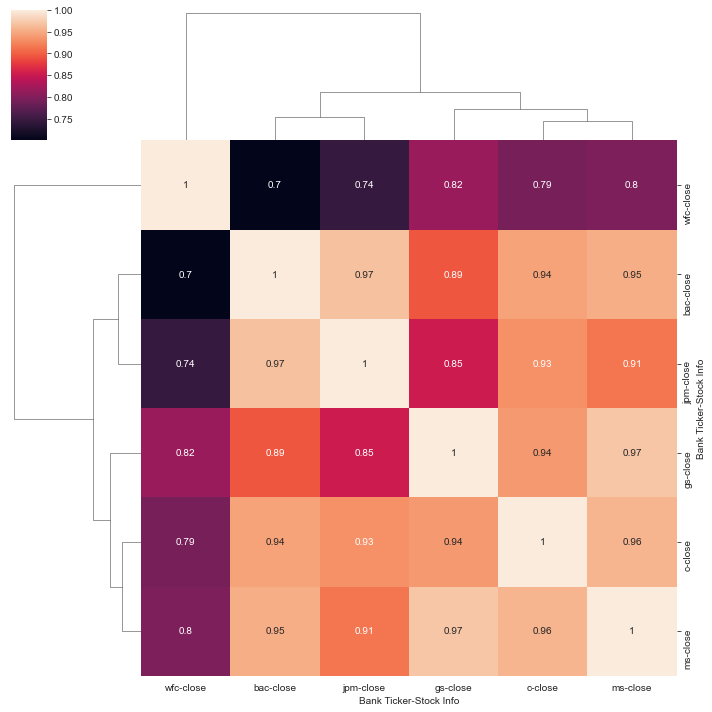

In [53]:
plt.figure(figsize = (6,6), dpi = 150)
sns.clustermap(dfh.corr(),annot = True)